# **TASK: Binary classification task on the `onlinefoods` dataset.**

The goal is to predict the value of the `Feedback` column, which indicates whether a customer's feedback is positive or negative.

# Data Preprocessing

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
data = pd.read_csv('onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
print(f"Size of the dataset: {data.shape}")

Size of the dataset: (388, 13)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [6]:
# Data Cleaning
clean_data = data.drop('Unnamed: 12', axis = 1)
clean_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [7]:
clean_data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


# Demographic Analysis

In [8]:
# Ecoding the data
clean_data['Output'] = clean_data['Output'].replace({'No': 0, 'Yes': 1})
clean_data['Feedback'] = clean_data['Feedback'].replace({'Negative': 0, 'Positive': 1})
clean_data['Feedback'] = clean_data['Feedback'].replace({'Negative ': 0, 'Positive': 1})

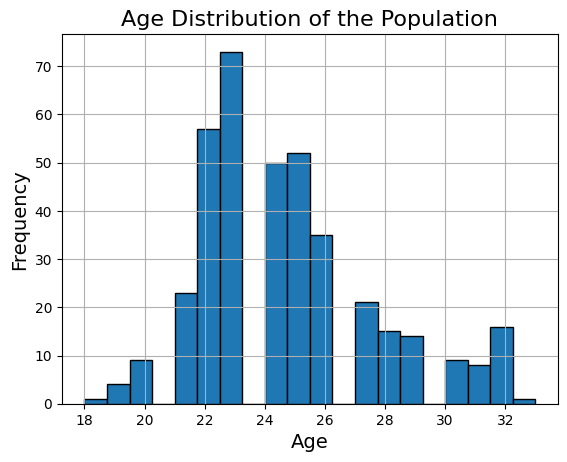

In [9]:
clean_data['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution of the Population', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

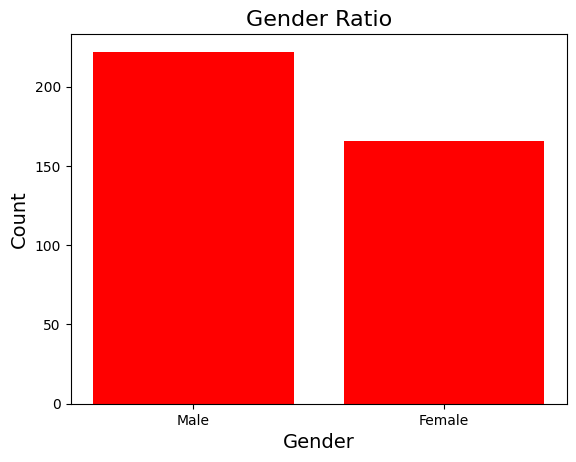

In [10]:
gender_counts = clean_data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='red')
plt.title('Gender Ratio', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

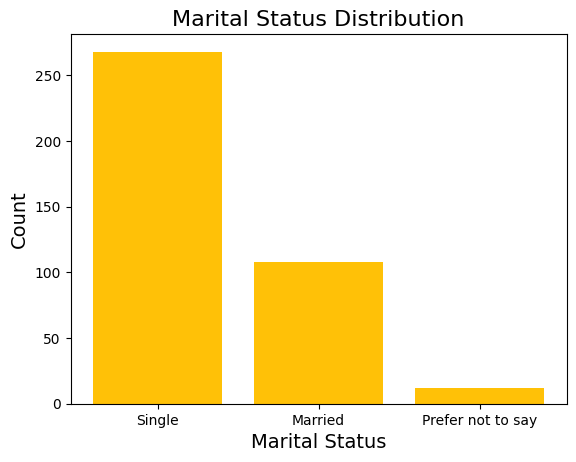

In [11]:
marital_status_counts = clean_data['Marital Status'].value_counts()
plt.bar(marital_status_counts.index, marital_status_counts.values, color='#FFC107')
plt.title('Marital Status Distribution', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

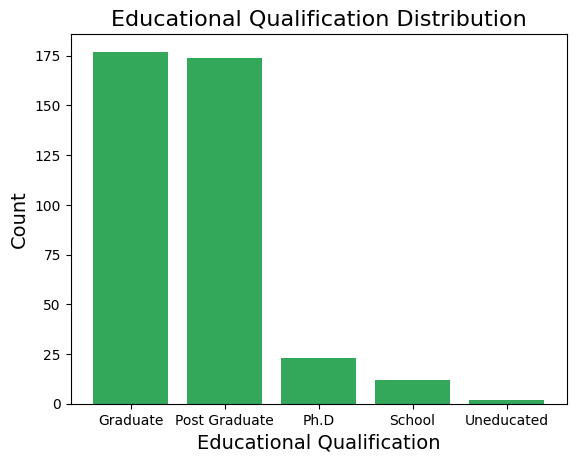

In [12]:
education_counts = clean_data['Educational Qualifications'].value_counts()
plt.bar(education_counts.index, education_counts.values, color='#34A85A')
plt.title('Educational Qualification Distribution', fontsize=16)
plt.xlabel('Educational Qualification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

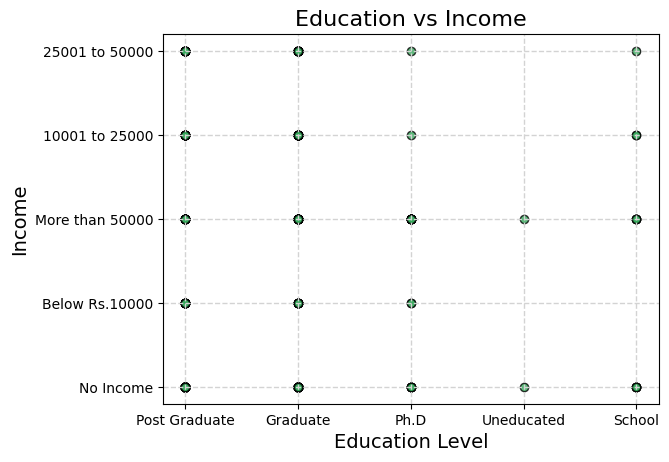

In [13]:
plt.scatter(clean_data['Educational Qualifications'], clean_data['Monthly Income'], c='#34A85A', edgecolor='#000000', alpha=0.8)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.title('Education vs Income', fontsize=16)
plt.grid(color='#d3d3d3', linestyle='--', linewidth=1)
plt.show()

In [14]:
average_family_size = clean_data['Family size'].mean().__round__()
print('Average family size: ',average_family_size)

Average family size:  3


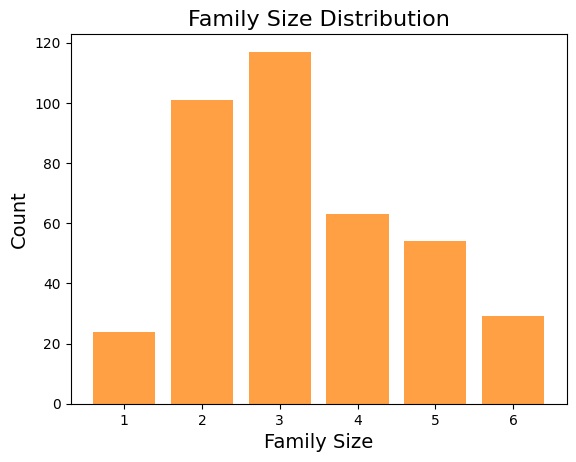

In [15]:
family_size_counts = clean_data['Family size'].value_counts()
plt.bar(family_size_counts.index, family_size_counts.values, color='#FFA044')
plt.title('Family Size Distribution', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

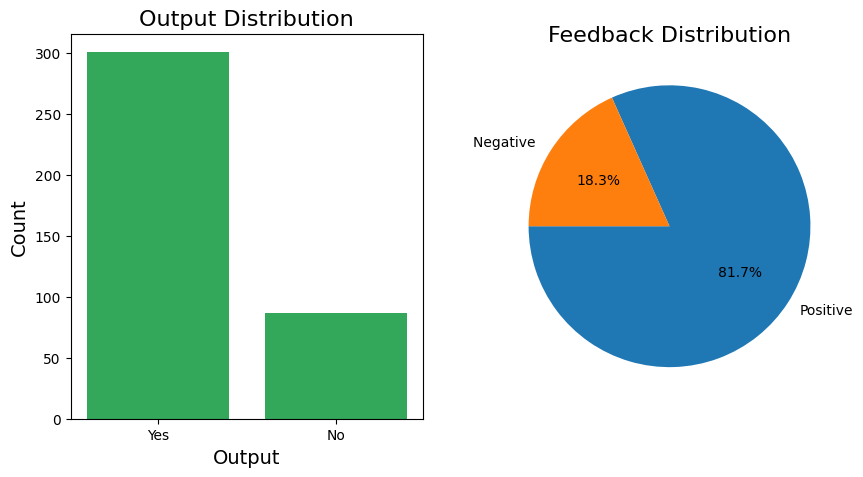

In [16]:
# What is the meaning of the "Output" and "Feedback" columns?
output_counts = clean_data['Output'].value_counts()
feedback_counts = clean_data['Feedback'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(data['Output'].value_counts().index, output_counts.values, color='#34A85A')
plt.title('Output Distribution', fontsize=16)
plt.xlabel('Output', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(1, 2, 2)
plt.pie(feedback_counts.values, labels=data['Feedback'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title('Feedback Distribution', fontsize=16)

plt.show()

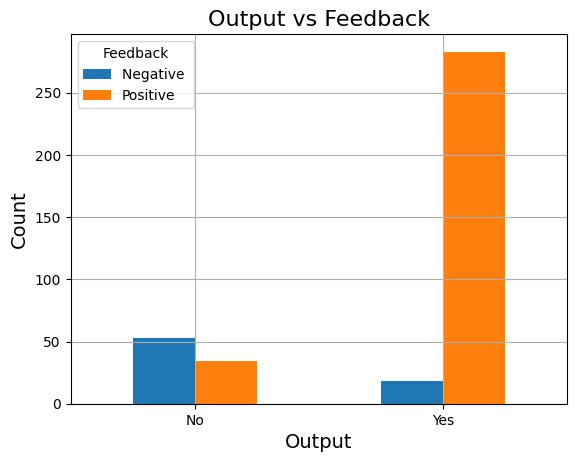

In [17]:
output_feedback_counts = data.groupby('Output')['Feedback'].value_counts().unstack()
output_feedback_counts.plot(kind='bar')
plt.title('Output vs Feedback', fontsize=16)
plt.xlabel('Output', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [18]:
categorical_col = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications']
numerical_col = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code', 'Output', 'Feedback']

In [19]:
# Encoding categorical data into numerical
label_encoder = LabelEncoder()

for col in categorical_col:
  print(col)
  clean_data[col] = label_encoder.fit_transform(clean_data[col])

clean_data.head()

Gender
Marital Status
Occupation
Monthly Income
Educational Qualifications


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1


In [20]:
# Defining the target variable
target = clean_data.pop('Feedback')

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=2, random_state=42)
X_res, y_res = smote.fit_resample(clean_data, target)
print(f"X resampled: {X_res.shape}")
print(f"X resampled: {y_res.shape}")

X resampled: (634, 11)
X resampled: (634,)


In [22]:
# Splitting the data into Training and Test data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=32)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (507, 11)
X_test shape: (127, 11)
y_train shape: (507,)
y_test shape: (127,)


# Modeling, Predicting, and Evaluating

### **Random Forest CLassifier**

In [65]:
# Decision tree
class DecisionTree:
    def __init__(self, max_depth=2, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_labels == 1 or n_samples < self.min_samples_split:
            return LeafNode(y)

        # Find best split
        best_idx, best_thr = None, None
        best_gini = 1
        for idx in range(n_features):
            thresholds = np.unique(X[:, idx])
            for thr in thresholds:
                left_indices = np.where(X[:, idx] <= thr)[0]
                right_indices = np.where(X[:, idx] > thr)[0]
                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_idx, best_thr, best_gini = idx, thr, gini

        # Split data
        left_indices = np.where(X[:, best_idx] <= best_thr)[0]
        right_indices = np.where(X[:, best_idx] > best_thr)[0]
        left_tree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return DecisionNode(best_idx, best_thr, left_tree, right_tree)

    def _gini_impurity(self, left_y, right_y):
        p_left = len(left_y) / (len(left_y) + len(right_y))
        p_right = len(right_y) / (len(left_y) + len(right_y))
        return p_left * self._gini(left_y) + p_right * self._gini(right_y)

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return 1 - np.sum(probs ** 2)

    def predict(self, X):
        predictions = np.array([self._predict(x, self.tree) for x in X])
        return predictions

    def _predict(self, x, tree):
        if isinstance(tree, LeafNode):
            return np.mean(tree.y)
        if x[tree.idx] <= tree.thr:
            return self._predict(x, tree.left)
        else:
            return self._predict(x, tree.right)

class DecisionNode:
    def __init__(self, idx, thr, left, right):
        self.idx = idx
        self.thr = thr
        self.left = left
        self.right = right

    def predict(self, x):
        if x[self.idx] <= self.thr:
            return self.left.predict(x)
        else:
            return self.right.predict(x)

class LeafNode:
    def __init__(self, y):
        self.y = y

    def predict(self, x):
        return np.mean(self.y)

In [66]:
# Random Forest Classifier
class RandomForestModel:
    def __init__(self, n_estimators, max_depth, min_samples_split):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            idx = np.random.choice(n_samples, n_samples, replace=True)
            tree.fit(X[idx], y[idx])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(len(X))
        for tree in self.trees:
            predictions += tree.predict(X)
        return np.round(predictions / len(self.trees))

In [109]:
# Initiate the Random Forest model
random_forest = RandomForestModel(n_estimators=100, max_depth=1, min_samples_split=2)
print("RF model initiated...")

# Training Random Forest model
rf_train_start_time = time.time()
random_forest.fit(X_train.values, y_train.values)
training_time_rf = time.time() - rf_train_start_time
print("RF model trained...")

# Predict the new data
rf_test_start_time = time.time()
rf_predictions = random_forest.predict(X_test.values)
testing_time_rf = time.time() - rf_test_start_time
print("Predictions are done...")

print("--------------------------------------")
print("Training time for Random Forest: ", training_time_rf, " seconds")
print("Testing time for Random Forest: ", testing_time_rf, " seconds")

RF model initiated...
RF model trained...
Predictions are done...
--------------------------------------
Training time for Random Forest:  13.249683141708374  seconds
Testing time for Random Forest:  0.43000245094299316  seconds


### **XGBoost Model**

In [68]:
# XGBoost model
class XGBoostModel:
    def __init__(self, n_estimators, learning_rate, max_depth):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.zeros(len(y))
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.trees.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(y_pred)

In [114]:
# Initiate the XGBoost model
xgb = XGBoostModel(n_estimators=100, learning_rate=0.1, max_depth=3)
print("XGBoost model initiated...")

# Training the XGBoost model
xgb_train_start_time = time.time()
xgb.fit(X_train.values, y_train.values)
training_time_xgb = time.time() - xgb_train_start_time
print("XGBoost model trained...")

# Testing time for XGBoost
xgb_test_start_time = time.time()
xgb_predictions = xgb.predict(X_test.values)
testing_time_xgb = time.time() - xgb_test_start_time
print("Predictions are done...")

print("--------------------------------------")
print("Training time for XGBoost: ", training_time_xgb, " seconds")
print("Testing time for XGBoost: ", testing_time_xgb, " seconds")

XGBoost model initiated...
XGBoost model trained...
Predictions are done...
--------------------------------------
Training time for XGBoost:  20.281821966171265  seconds
Testing time for XGBoost:  0.10647416114807129  seconds


### **Gradient Boosting Classifier**

In [111]:
# Gradient Boosting Classifier
class GradientBoostingClassifier:
    def __init__(self, n_estimators, learning_rate, max_depth):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        F0 = np.zeros(len(y))
        for m in range(1, self.n_estimators + 1):
            p = np.exp(F0) / (1 + np.exp(F0))
            r = y - p
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, r)
            self.trees.append(tree)
            F0 += self.learning_rate * tree.predict(X)

    def predict(self, X):
        F = np.zeros(len(X))
        for tree in self.trees:
            F += self.learning_rate * tree.predict(X)
        return np.round(np.exp(F) / (1 + np.exp(F)))

In [115]:
# Instantiate the GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
print("Gradient Boosting Classifier initiated...")

# Train the model
gbc_train_start_time = time.time()
gbc.fit(X_train.values, y_train.values)
training_time_gbc = time.time() - gbc_train_start_time
print("Gradient Boosting Classifier trained...")

# Make predictions
gbc_test_start_time = time.time()
gbc_predictions = gbc.predict(X_test.values)
testing_time_gbc = time.time() - gbc_test_start_time
print("Predictions are done...")

print("--------------------------------------------------------------")
print("Training time for Gradient Boosting Classifier: ", training_time_gbc, " seconds")
print("Testing time for Gradient Boosting Classifier: ", testing_time_gbc, " seconds")

Gradient Boosting Classifier initiated...
Gradient Boosting Classifier trained...
Predictions are done...
--------------------------------------------------------------
Training time for Gradient Boosting Classifier:  33.714502811431885  seconds
Testing time for Gradient Boosting Classifier:  0.12598323822021484  seconds


### **Evaluation Metrics for all models**

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test.values, rf_predictions)
precision_rf = precision_score(y_test.values, rf_predictions)
recall_rf = recall_score(y_test.values, rf_predictions)
f1_rf = f1_score(y_test.values, rf_predictions)

print("Random Forest Evaluation Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

# Evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test.values, xgb_predictions)
precision_xgb = precision_score(y_test.values, xgb_predictions)
recall_xgb = recall_score(y_test.values, xgb_predictions)
f1_xgb = f1_score(y_test.values, xgb_predictions)

print("\nXGBoost Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

# Evaluation metrics for Gradient Boosting Classifier
accuracy_gbc = accuracy_score(y_test.values, gbc_predictions)
precision_gbc = precision_score(y_test.values, gbc_predictions)
recall_gbc = recall_score(y_test.values, gbc_predictions)
f1_gbc = f1_score(y_test.values, gbc_predictions)

print("\nGradient Boosting Evaluation Metrics:")
print("Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1-score:", f1_gbc)

Random Forest Evaluation Metrics:
Accuracy: 0.905511811023622
Precision: 0.8615384615384616
Recall: 0.9491525423728814
F1-score: 0.903225806451613

XGBoost Evaluation Metrics:
Accuracy: 0.937007874015748
Precision: 0.9180327868852459
Recall: 0.9491525423728814
F1-score: 0.9333333333333333

Gradient Boosting Evaluation Metrics:
Accuracy: 0.9291338582677166
Precision: 0.9464285714285714
Recall: 0.8983050847457628
F1-score: 0.9217391304347826


### **Confusion Matrices for all models**

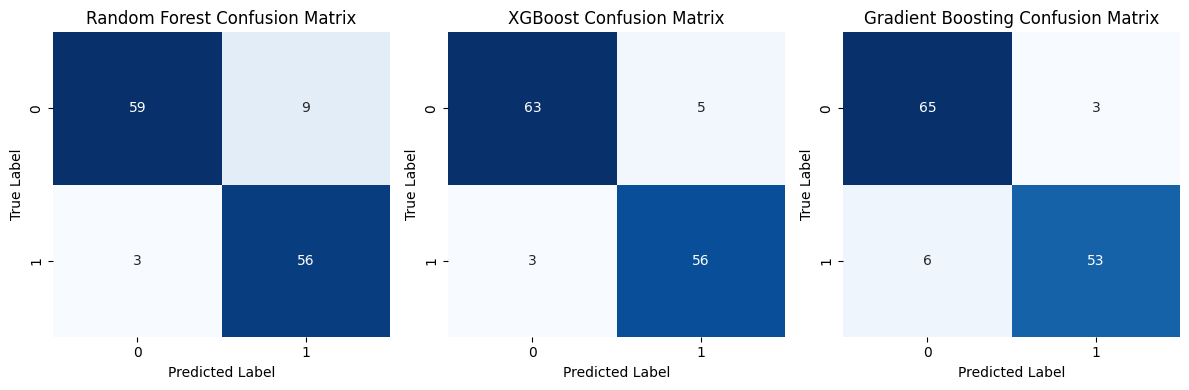

In [122]:
# Confusion Matrix Visualization
cm_rf = confusion_matrix(y_test.values, rf_predictions)
cm_xgb = confusion_matrix(y_test.values, xgb_predictions)
cm_gbc = confusion_matrix(y_test.values, gbc_predictions)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_gbc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

### **ROC and Precision-Recall Curves for all models**

In [124]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Compute ROC and Precision-Recall curve  for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_predictions)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_predictions)
pr_auc_rf = auc(recall_rf, precision_rf)

# Compute ROC and Precision-Recall curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_predictions)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_predictions)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

# Compute ROC and Precision-Recall curve for Gradient Boosting Classifier
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, gbc_predictions)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
precision_gbc, recall_gbc, _ = precision_recall_curve(y_test, gbc_predictions)
pr_auc_gbc = auc(recall_gbc, precision_gbc)

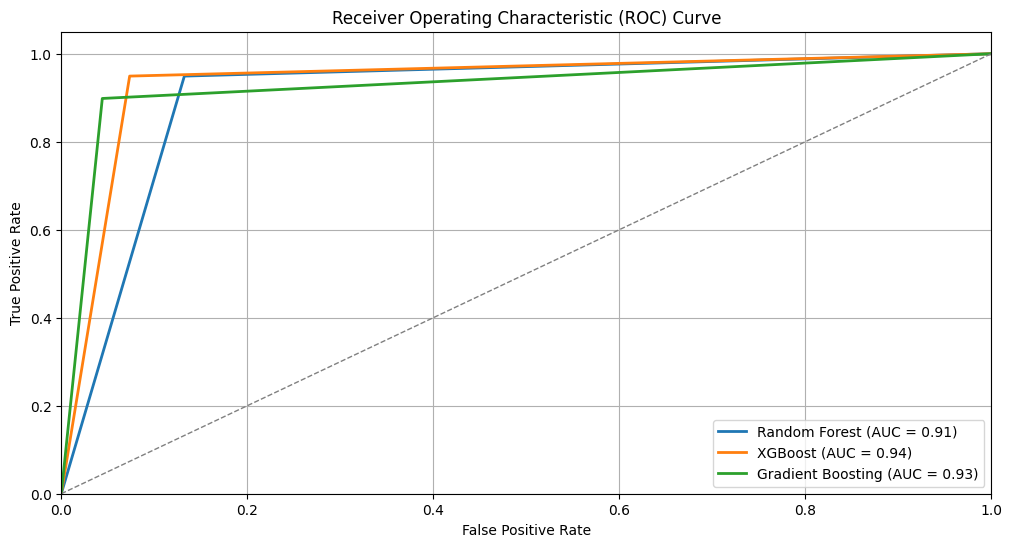

In [126]:
# Plot ROC curve
plt.figure(figsize=(12, 6))

plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_gbc, tpr_gbc, lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

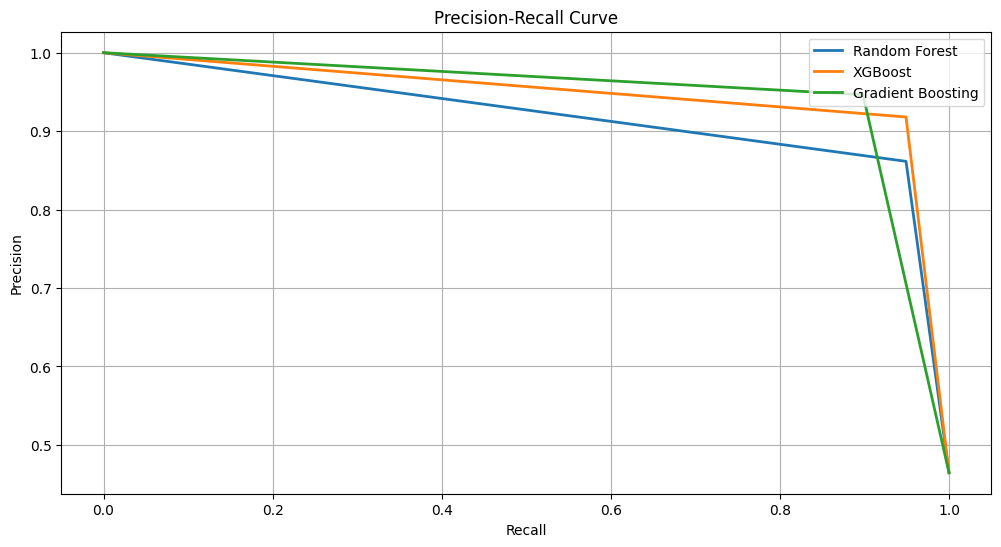

In [127]:
# Precision-Recall Curves
plt.figure(figsize=(12, 6))

plt.plot(recall_rf, precision_rf, lw=2, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, lw=2, label='XGBoost')
plt.plot(recall_gbc, precision_gbc, lw=2, label='Gradient Boosting')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()